In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import roc_auc_score,auc,classification_report,roc_curve,accuracy_score,r2_score,recall_score,precision_score,f1_score,confusion_matrix,RocCurveDisplay,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score 

In [10]:
df=pd.read_csv("/content/drive/MyDrive/data.csv")

In [11]:
df

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [12]:
"""
print dimensionality of the data, columns, types and missing values
"""
print(f"Data dimension: {df.shape}")
for col in df.columns:
    print(f"Column: {col:35} | type: {str(df[col].dtype):7} \
| missing values: {df[col].isna().sum():3d}")

Data dimension: (863, 15)
Column: Unnamed: 0                          | type: int64   | missing values:   0
Column: location                            | type: int64   | missing values:   0
Column: country                             | type: int64   | missing values:   0
Column: gender                              | type: int64   | missing values:   0
Column: age                                 | type: float64 | missing values:   0
Column: vis_wuhan                           | type: int64   | missing values:   0
Column: from_wuhan                          | type: int64   | missing values:   0
Column: symptom1                            | type: int64   | missing values:   0
Column: symptom2                            | type: int64   | missing values:   0
Column: symptom3                            | type: int64   | missing values:   0
Column: symptom4                            | type: int64   | missing values:   0
Column: symptom5                            | type: int64   | missing va

In [13]:
df_p=df.copy()

In [14]:
df=df.drop(["Unnamed: 0"],axis=1)

In [15]:
df.shape

(863, 14)

In [16]:
df.columns.values.tolist()

['location',
 'country',
 'gender',
 'age',
 'vis_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'diff_sym_hos',
 'result']

In [17]:
# df.info()
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [18]:
df.rename(columns={"vis_wuhan":"visited_wuhan"},inplace=True)
df.rename(columns={"diff_sym_hos":"days_before_symptoms"},inplace=True)

In [19]:
# x = df.loc[:, "location":"diff_sym_hos"]
x = df.iloc[:, 0:13]
y= df.iloc[:,-1].values.reshape(-1,1)

In [20]:
print(x.shape)
print(y.shape)


(863, 13)
(863, 1)


In [21]:
df.columns.values.tolist()

['location',
 'country',
 'gender',
 'age',
 'visited_wuhan',
 'from_wuhan',
 'symptom1',
 'symptom2',
 'symptom3',
 'symptom4',
 'symptom5',
 'symptom6',
 'days_before_symptoms',
 'result']

# Checking for columns with NaN values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              863 non-null    int64  
 1   country               863 non-null    int64  
 2   gender                863 non-null    int64  
 3   age                   863 non-null    float64
 4   visited_wuhan         863 non-null    int64  
 5   from_wuhan            863 non-null    int64  
 6   symptom1              863 non-null    int64  
 7   symptom2              863 non-null    int64  
 8   symptom3              863 non-null    int64  
 9   symptom4              863 non-null    int64  
 10  symptom5              863 non-null    int64  
 11  symptom6              863 non-null    int64  
 12  days_before_symptoms  863 non-null    int64  
 13  result                863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


we deduce that no found nan

or using

In [23]:
df.columns[df.isna().any()]

Index([], dtype='object')

# Checking unique values in columns with categorical data

In [24]:
df.nunique()

location                139
country                  34
gender                    3
age                      81
visited_wuhan             2
from_wuhan                2
symptom1                 25
symptom2                 32
symptom3                 20
symptom4                 13
symptom5                  4
symptom6                  2
days_before_symptoms     18
result                    2
dtype: int64

In [25]:
# df["gender"].unique()
np.unique(df["gender"])

array([0, 1, 2])

In [26]:
for col in df.columns:
    print(f"{col}:{np.unique(df[col])}",4*"* ")

location:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138] * * * * 
country:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] * * * * 
gender:[0 1 2] * * * * 
age:[ 2.   4.   5.   6.   8.   9.  11.  15.  16.  18.  19.  20.  21.  22.
 23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.
 37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  49.4
 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  

In [27]:
df.columns

Index(['location', 'country', 'gender', 'age', 'visited_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'days_before_symptoms', 'result'],
      dtype='object')

In [28]:
x = df.iloc[:, 0:13]
y= df.iloc[:,-1].values.reshape(-1,1)

In [29]:
x.shape

(863, 13)

# Checking for correlation between each feature and the target

In [30]:
df.drop("result",axis=1).apply(lambda x:x.corr(df["result"]))

location                0.046240
country                -0.094443
gender                 -0.061441
age                     0.515127
visited_wuhan          -0.151122
from_wuhan              0.128314
symptom1               -0.163039
symptom2               -0.103270
symptom3               -0.074982
symptom4               -0.108723
symptom5                0.020676
symptom6                0.012882
days_before_symptoms    0.219116
dtype: float64

**The feature that correlates the most with the result is the "age", but since the rest of the correlations (whether positive or negative) are small and we can not consider only the age feature for creating the model, we are going to use all the features for the model creation.**

In [31]:


list_of_numerics = df.select_dtypes(include=['float', 'int']).columns
types = df.dtypes
missing = round((df.isnull().sum() / df.shape[0]) * 100, 3)

overview_data = {}
outliers_data = {}

# Calculate overview and outliers for each column
for col in df.columns:
    if col in list_of_numerics:
        overview_data[col] = [round(df[col].min()),
                              round(df[col].max()),
                              round(df[col].mean()),
                              round(df[col].quantile(0.5))]

        lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
        upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
        outliers_data[col] = sum((df[col] < lower_bound) | (df[col] > upper_bound))
    else:
        overview_data[col] = df[col].unique()
        outliers_data[col] = ''

# Create DataFrame
explo = pd.DataFrame({
    'Types': types,
    'Missing%': missing,
    'Overview': overview_data,
    'Outliers': outliers_data
}).sort_values(by=['Missing%', 'Types'], ascending=False)

explo.transpose()


,age,location,country,gender,visited_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,days_before_symptoms,result
Types,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Missing%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Overview,"[2, 96, 49, 49]","[0, 138, 77, 87]","[0, 33, 17, 18]","[0, 2, 1, 1]","[0, 1, 0, 0]","[0, 1, 0, 0]","[0, 24, 12, 14]","[0, 31, 28, 31]","[0, 19, 18, 19]","[0, 12, 12, 12]","[0, 3, 3, 3]","[0, 1, 1, 1]","[-5, 15, 1, 0]","[0, 1, 0, 0]"
Outliers,27,0,0,0,157,93,219,139,60,19,3,1,121,108


### Using `one-hot encoding` with columns that contain `categorical values` (the columns of `"vis_wuhan"` and `"from_wuhan"` already have values of `0 and 1` only so no need to include them)

In [32]:
df_c=df.copy()

In [33]:
X_new = pd.get_dummies(x,columns = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','gender'])
X_new.shape

(863, 275)

In [34]:
X_new

,age,visited_wuhan,from_wuhan,symptom6,days_before_symptoms,location_0,location_1,location_2,location_3,location_4,...,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,gender_0,gender_1,gender_2
0,66.0,1,0,1,8,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,56.0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,46.0,0,1,1,13,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,60.0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,58.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
859,35.0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
860,49.4,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
861,49.4,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [35]:
X_new.location_0.dtype
# uint8  represent binary data or categorical variables after applying one-hot encoding

dtype('uint8')

In [36]:
type(X_new)

pandas.core.frame.DataFrame

Splitting the data into train, validation and test sets (with ratios**` 0.6,0.2 and 0.2`** respectively) using data `get dummies`

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=10,shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10,shuffle=True)

In [38]:
neigh=KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_predict=neigh.predict(X_val)
print (accuracy_score(y_val,y_predict))

0.9595375722543352


In [39]:
X_new.shape

(863, 275)

Scaling columns with numeric data (age and days before symptoms) so that the values lie between 0 and 1, then testing whether the accuracy would change or not for the same value of k=3

In [40]:
scaler=MinMaxScaler()
X_new_scaled=scaler.fit_transform(X_new)

In [41]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_new_scaled, y, test_size=0.2, random_state=10,shuffle=True)

X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train_scaled, test_size=0.25, random_state=10,shuffle=True)


after scaled

In [42]:
neigh=KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_scaled,y_train_scaled)
y_predict_test=neigh.predict(X_val_scaled)
print (accuracy_score(y_val_scaled,y_predict_test))

0.8670520231213873


Reverting the data to how it was before scaling since the accuracy dropped by `9% `

Now using k-fold cross validation for choosing the best k

In [43]:
k_range = range(1, int(np.sqrt(X_new.shape[0])))
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_new, np.ravel(y) , cv = 10, scoring= 'accuracy')
  k_scores.append(scores.mean())


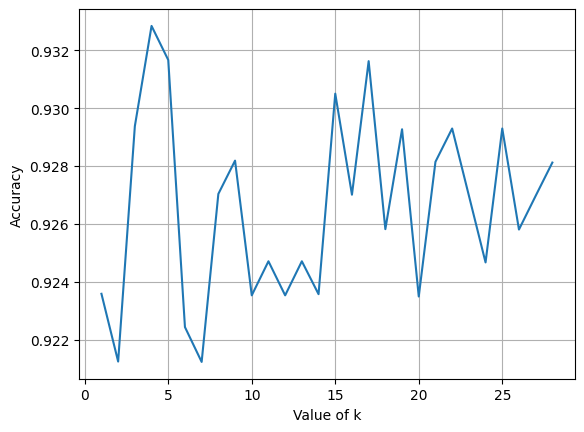

In [44]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.grid()

In [45]:
sorted(zip(k_scores, k_range), reverse=True)[:2]

[(0.9328388131515636, 4), (0.9316626570435712, 5)]

In [46]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_predict_test=knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_predict_test))
print("Precision: ", precision_score(y_test,y_predict_test))
print("Recall: ", recall_score(y_test,y_predict_test))
print("f1score: ", f1_score(y_test,y_predict_test))

Accuracy:  0.9190751445086706
Precision:  0.9166666666666666
Recall:  0.4583333333333333
f1score:  0.611111111111111


Auc : 0.72581096196868


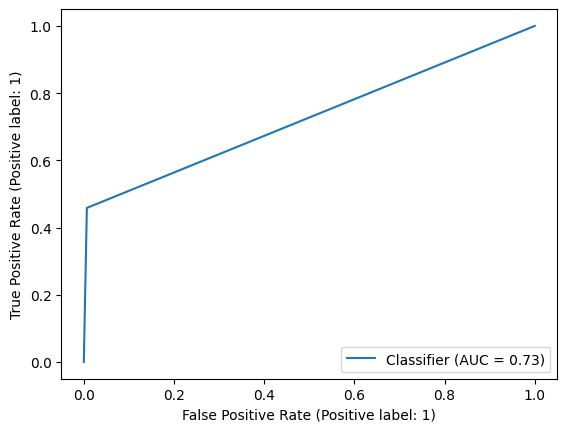

In [47]:
RocCurveDisplay.from_predictions(y_test,y_predict_test)
auc=roc_auc_score(y_test,y_predict_test)
print ("Auc :",auc)


In [48]:
from scipy.stats import mode
def eucledian_dist(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

def knn_alg(X_train, y_train , X_test, k):
    prediction_labels=[]
    for x in X_test:

        distances = []
        for i in range(len(X_train)):
            distance = eucledian_dist(x, X_train[i,:])
            distances.append(distance)

        distances = np.array(distances)
        #argsort is a function in NumPy that returns the indices that would sort an array in ascending order/
        # sorted_indices to index the original array
        k_distances = np.argsort(distances)[:k]
        labels = y_train[k_distances]
        #  selects the most common label among these neighbors as the predicted label for the test point using mode
        label = mode(labels).mode[0]
        prediction_labels.append(label)

    return prediction_labels

### Using our implemented algorithm on the training and test sets with the optimal value of k that we got through cross validation

In [49]:
y_pred = knn_alg(X_train.values,y_train,X_test.values, 17)

accuracy_score(y_test, y_pred)

0.9190751445086706

The same accuracy score was achieved as the one we got from sklearn's KNN (91.9%)

**Now moving to the Logistic Regression**

i will use GridSearch so Using GridSearch to find the best tuning for the hyperparameters (therefore no need for the validation set)

In [50]:
param_grid={
    'penalty': ['l1', 'l2','none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
}
clf_model=LogisticRegression()
clf=GridSearchCV(estimator=clf_model,cv=5,n_jobs=-1,param_grid=param_grid)

In [51]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [52]:
clf.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [53]:
pred = clf.predict(X_test)
accuracy_score(y_test,ypred)

NameError: name 'ypred' is not defined

In [ ]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"accuracy:{accuracy:.2f}")
print(f"precision:{precision:.2f}")
print(f"recall:{recall:.2f}")
print(f"f1:{f1:.2f}")
print ('\n clasification report:\n', classification_report(y_test,ypred))
# print ('\n confussion matrix:\n',confusion_matrix(y_test,ypred))
plt. figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt="g",cmap="summer")
plt.show()

 the accuracy is 0.98,
  which means that the model correctly classified 98% of the instances in the test set.

 precision is 0.92,
  which means that 92% of the instances that the model predicted as positive were actually positive.

the recall is
 0.92, which means that the model correctly classified 92% of the actual positive instances.

 the f1 score is 0.92,
 which means that the model has a good balance between precision and recall.

# **from confusion matrix**
the model:
Correctly classified 147 instances of the first class
Incorrectly classified 2 instances of the first class as the second class .
Incorrectly classified 2 instances of the second class as the first class .
Correctly classified 22 instances of the second class
Overall, the model performed well, with only 2 misclassifications out of a total of 173 instances.

**The `classification report` also shows that the model correctly classified 147 instances of the first class and 22 instances of the second class. It incorrectly classified 2 instances of the first class as the second class and 2 instances of the second class as the first class.**

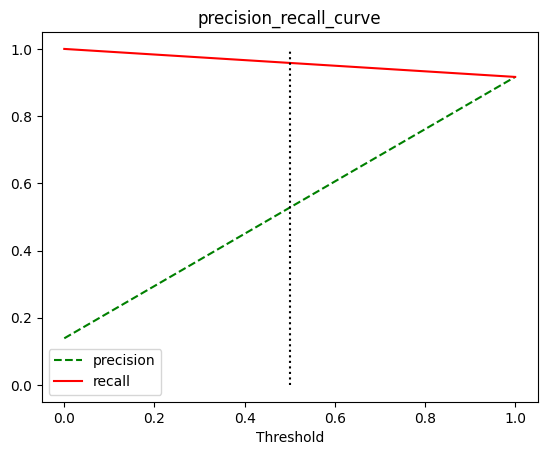

In [54]:
precision,recall,thresholds=precision_recall_curve(pred,y_test)
plt.plot(thresholds,precision[:-1],"g--",label='precision')
plt.plot(thresholds,recall[:-1],"r",label="recall")
plt.legend()
plt.xlabel('Threshold')
plt.title("precision_recall_curve")
threshold=0.5
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.show()

### **the best Threshold to achive balance is 0.5**

Auc : 0.9516219239373601


Text(0.5, 1.0, 'Receiver operating characteristic ')

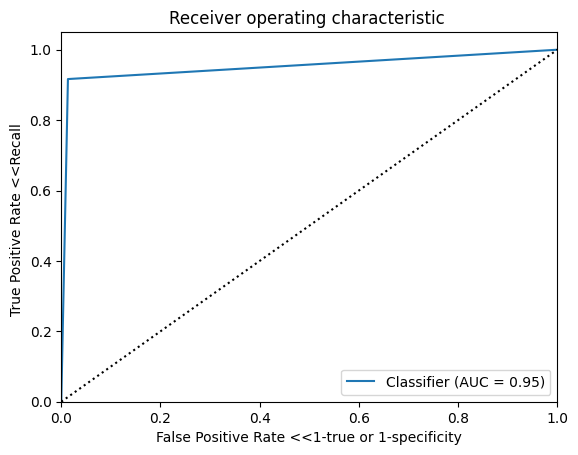

In [55]:
RocCurveDisplay.from_predictions(y_test,pred)
auc=roc_auc_score(y_test,pred)
print ("Auc :",auc)
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate <<1-true or 1-specificity")
plt.ylabel("True Positive Rate <<Recall ")
plt.title("Receiver operating characteristic ")

# plt.legend(loc="lower right")

The ROC curve shows that the model has
a good balance between sensitivity and specificity. Sensitivity is the ability of the model to correctly identify positive instances,while specificity is the ability of the model to correctly identify negative instances

### True Positive Rate (TPR) is the proportion of actual positives that are correctly classified as positives.
# False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly classified as positives.

#  Moving SVM

when we use svm we shoud use scalled data

In [56]:
param_grid = [
    {
    'C' : [0.1,1,10,100],
     'gamma' : [1,0.1,0.01,0.001],
     'kernel':['linear', 'poly', 'rbf'],
     'degree': [2,3,4]

    }
]
modelSVM=SVC()
Svc_G = GridSearchCV(modelSVM, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [57]:
Svc_G.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear', 'poly', 'rbf']}],
             verbose=True)

In [58]:
Svc_G.best_estimator_

SVC(C=100, degree=2, gamma=1, kernel='linear')

In [59]:
ypred=Svc_G.predict(X_test_scaled)
print ('Accuracy',accuracy_score(y_test_scaled,ypred))
print ('F1 score:', f1_score(y_test_scaled,ypred))
print ('Recall:', recall_score(y_test_scaled,ypred))
print ('Precision:', precision_score(y_test_scaled,ypred))

Accuracy 0.9826589595375722
F1 score: 0.9387755102040817
Recall: 0.9583333333333334
Precision: 0.92


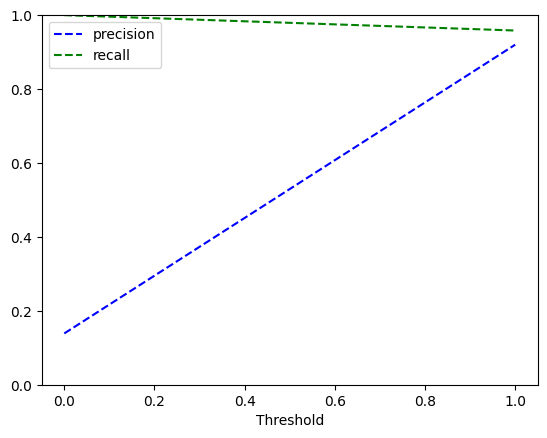

In [60]:
prec, rec, tre = precision_recall_curve(y_test_scaled, ypred, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Auc : 0.9724552572706936


Text(0.5, 1.0, 'Receiver operating characteristic ')

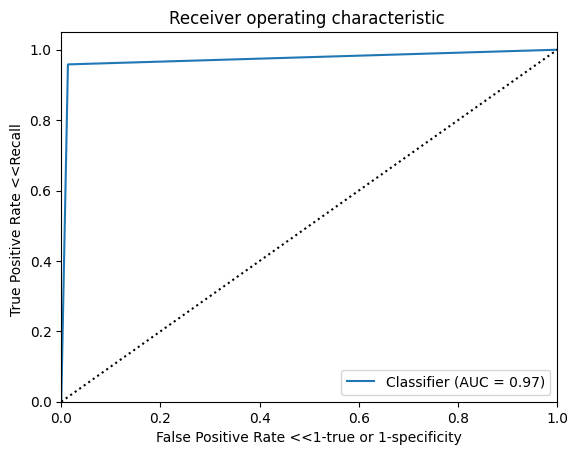

In [61]:
RocCurveDisplay.from_predictions(y_test_scaled,ypred)
auc=roc_auc_score(y_test_scaled,ypred)
print ("Auc :",auc)
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate <<1-true or 1-specificity")
plt.ylabel("True Positive Rate <<Recall ")
plt.title("Receiver operating characteristic ")

# plt.legend(loc="lower right")

**Decision tree**

In [62]:
DT=DecisionTreeClassifier()
param={
    "criterion" :['gini','entropy'],
    "max_depth":[2,4,6,7,8,10,12]
}
DT_G=GridSearchCV(DT,param_grid=param,verbose=True,n_jobs=-1)
DT_G.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 7, 8, 10, 12]},
             verbose=True)

In [75]:
params=DT_G.best_estimator_.get_params()
criterion= params["criterion"]
max_depth= params["max_depth"]
print(f"criterion:{criterion}")
print(f"max_depth:{max_depth}")
print(f"params:{params}")

criterion:entropy
max_depth:6
params:{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [77]:
y_pred=DT_G.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9421965317919075


### **when we use max_depth=7 **

In [103]:
Model_dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=42)
Model_dt = Model_dt.fit(X_train, y_train)
y_pred = Model_dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9653179190751445


In [108]:
print ('Accuracy',accuracy_score(y_test,y_pred))
print ('F1 score:', f1_score(y_test,y_pred))
print ('Recall:', recall_score(y_test,y_pred))
print ('Precision:', precision_score(y_test,y_pred))

Accuracy 0.9653179190751445
F1 score: 0.875
Recall: 0.875
Precision: 0.875


## RocCurveDisplay

Auc : 0.9274328859060402


Text(0.5, 1.0, 'Receiver operating characteristic ')

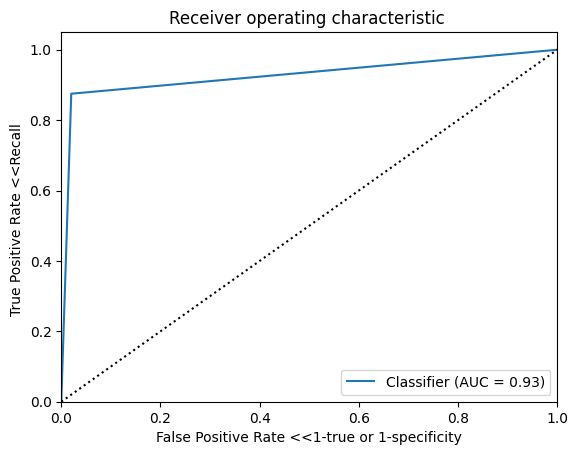

In [109]:
RocCurveDisplay.from_predictions(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
print ("Auc :",auc)
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate <<1-true or 1-specificity")
plt.ylabel("True Positive Rate <<Recall ")
plt.title("Receiver operating characteristic ")

### or using partion

In [111]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
print(roc_auc) 

0.9274328859060402


# precision_recall_curve

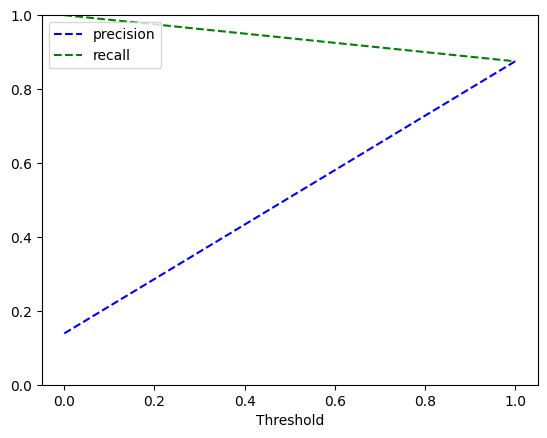

In [114]:
prec, rec, tre = precision_recall_curve(y_test, y_pred, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

### the **`precision-recall curve`** shows that the model has a high precision at low recall values, and a low precision at high recall values. This indicates that the model is good at correctly identifying positive instances when there are few false positives, but it is not as good at correctly identifying positive instances when there are many false positives.

### The `**best threshold**` for the model  If it is more important to minimize false positives, then a higher threshold should be used. If it is more important to minimize false negatives, then a lower threshold should be used.


# in training

In [117]:
 y_train_pred= Model_dt.predict(X_train)

In [119]:
accuracy_score(y_train, y_train_pred)

0.9864603481624759

## in test =0.96

# No Moving to **Naive Bayes**

In [125]:
NG=GaussianNB()
NG.fit(X_train, y_train)
pred_ng = NG.predict(X_test)
accuracy = accuracy_score(y_test, pred_ng)
accuracy

0.5202312138728323

In [126]:
print ('F1 score:', f1_score(y_test, pred_ng))
print ('Recall:', recall_score(y_test, pred_ng))
print ('Precision:', precision_score(y_test, pred_ng))

F1 score: 0.3252032520325203
Recall: 0.8333333333333334
Precision: 0.20202020202020202


In [127]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X_train)
scaledTest = scaler.transform(X_test)
nb_classifier = GaussianNB(var_smoothing=0.02848035868435802)
nb_classifier = nb_classifier.fit(scaledX, np.ravel(y_train))
y_predscaled = nb_classifier.predict(scaledTest)
print ('Accuracy',accuracy_score(y_test,y_predscaled))

Accuracy 0.5202312138728323


In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
                 param_grid=params_NB,
                 cv=5,
                 verbose=1,
                 scoring='accuracy')
gs_NB.fit(X_train, y_train.ravel())

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.02848035868435802}

## After use **BernoulliNB**

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X_train)
scaledTest = scaler.transform(X_test)
nb_classifier = GaussianNB(var_smoothing=0.02848035868435802)
nb_classifier = nb_classifier.fit(scaledX, np.ravel(y_train))
y_predscaled = nb_classifier.predict(scaledTest)

bnb = BernoulliNB()
bnb = bnb.fit(scaledX,np.ravel(y_train))
y_predbnb = bnb.predict(scaledTest)

In [139]:
print ('Accuracy',metrics.accuracy_score(y_test,y_predbnb))


Accuracy 0.8439306358381503
